This is Lena's jupyter for data manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_rows', 300)

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

### Step 1:
First lets load the main data table and fix formating issues in it

In [3]:
# Part 1 - Read the dataset, remove empty columns and first 204 lines,
# use only columns 0,1,4,5,7,8,9,11,12:
df = pd.read_excel('../data/OrderColorTransitionsReport 1_1_17 - 4_22_19.xlsx',
                   header=205, usecols=[0, 1, 4, 5, 7, 8, 9, 11, 12])

# Part 2 - Organize the data:
# Currently all Sheet columns (last 3 columns) are from string data type.
# And they have numbers like "1,142".
# We need to get rid of the "," and convert the string type to numeric type.

# Removing the "," by using "replace" function.
# This converts a column to a list.
total_sheets = [x.replace(',', '') for x in df['Total Sheets'].astype(str)]
a_grade_sheets = [x.replace(',', '') for x in df['AGrade Sheets'].astype(str)]
transition_sheets = [x.replace(',', '') for x in
                     df['Transition Sheets'].astype(str)]

# Converting a list back to the column and to numeric data type.
df[df.columns[-3]] = pd.DataFrame(total_sheets)
df[df.columns[-3]] = pd.to_numeric(df[df.columns[-3]], errors='coerce')
df[df.columns[-3]] = df[df.columns[-3]].fillna(0)

df[df.columns[-2]] = pd.DataFrame(a_grade_sheets)
df[df.columns[-2]] = pd.to_numeric(df[df.columns[-2]], errors='coerce')
df[df.columns[-2]] = df[df.columns[-2]].fillna(0)

df[df.columns[-1]] = pd.DataFrame(transition_sheets)
df[df.columns[-1]] = pd.to_numeric(df[df.columns[-1]], errors='coerce')
df[df.columns[-1]] = df[df.columns[-1]].fillna(0)

# Converting date/time columns to date/time format:
df[df.columns[-5]] = pd.to_datetime(df[df.columns[-5]])
df[df.columns[-4]] = pd.to_datetime(df[df.columns[-4]])

# Sorting by "Cast Start" time, changing the original order:
df.sort_values(by='Cast Start', ignore_index=True, inplace=True)

df

,Cast Order,Color,Next Cast Order,Next Color Code,Cast Start,Cast End Time,Total Sheets,AGrade Sheets,Transition Sheets
0,11492916,GW,11503891,CT,2017-01-01 22:04:00,2017-01-02 02:10:00,451,411.0,1.0
1,11503891,CT,11503893,DV,2017-01-02 02:11:00,2017-01-02 13:38:00,1255,1164.0,60.0
2,11503893,DV,11503894,WH,2017-01-02 13:38:00,2017-01-03 01:02:00,1248,1225.0,8.0
3,11492915,GW,11504178,FB,2017-01-03 00:49:00,2017-01-03 03:00:00,292,288.0,2.0
4,11503894,WH,11503896,RP,2017-01-03 01:03:00,2017-01-03 13:24:00,1351,1300.0,16.0
...,...,...,...,...,...,...,...,...,...
4184,12944039,FT,12953366,W7,2019-04-20 05:49:00,2019-04-20 09:09:00,343,330.0,13.0
4185,12943708,SV,12954266,ZC,2019-04-20 22:37:00,2019-04-21 00:18:00,215,205.0,23.0
4186,12954266,ZC,12954164,ZT,2019-04-21 00:18:00,2019-04-21 04:34:00,547,533.0,15.0
4187,12954164,ZT,12947087,N3,2019-04-21 04:34:00,2019-04-21 05:48:00,162,144.0,4.0


### Step 2:
Lets take a closer look at the data:

In [4]:
df.describe()

,Cast Order,Next Cast Order,Total Sheets,AGrade Sheets,Transition Sheets
count,4.189000e+03,4.189000e+03,4189.000000,4189.000000,4189.000000
mean,1.381548e+07,1.381554e+07,654.646455,564.581762,46.449033
std,4.113231e+07,4.113231e+07,990.431698,895.569553,83.721346
min,1.144690e+07,1.144690e+07,1.000000,0.000000,0.000000
25%,1.156429e+07,1.156430e+07,82.000000,17.000000,11.000000
50%,1.161724e+07,1.161719e+07,315.000000,261.000000,19.000000
75%,1.266532e+07,1.266533e+07,813.000000,691.000000,45.000000
max,9.000849e+08,9.000849e+08,11678.000000,10657.000000,1511.000000


In [5]:
df.loc[df['Transition Sheets'] > 600]

,Cast Order,Color,Next Cast Order,Next Color Code,Cast Start,Cast End Time,Total Sheets,AGrade Sheets,Transition Sheets
264,11510469,MW,11512836,BE,2017-02-17 07:52:00,2017-02-17 13:25:00,611,2.0,609.0
266,11512836,BE,11519395,FT,2017-02-17 13:26:00,2017-02-17 16:21:00,433,428.0,612.0
1205,11574375,RU,11574412,RU,2017-08-28 19:42:00,2017-08-29 04:02:00,89,43.0,782.0
1574,11600285,CW,11600273,WI,2017-11-21 06:02:00,2017-11-21 09:53:00,461,399.0,897.0
2340,11628656,FQ,11628423,AE,2018-04-04 02:47:00,2018-04-04 20:47:00,924,7.0,917.0
2342,11628423,AE,11634223,B3,2018-04-04 20:47:00,2018-04-04 22:28:00,175,169.0,923.0
2372,11632093,GW,11626585,SL,2018-04-06 23:24:00,2018-04-07 09:25:00,1245,1191.0,614.0
2625,11646446,GW,11628480,LI,2018-05-28 17:18:00,2018-05-28 17:19:00,3,3.0,784.0
2820,11652315,CW,11659406,BI,2018-07-09 21:51:00,2018-07-10 18:50:00,2345,2017.0,727.0
2916,12660103,W5,11655095,GW,2018-07-26 04:37:00,2018-07-26 18:00:00,709,13.0,696.0


Now lets plot the distribution of transition sheets:

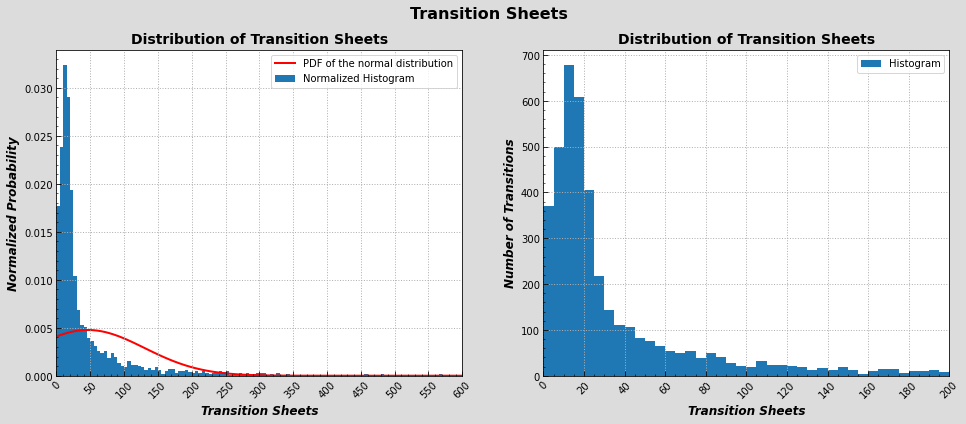

In [6]:
# Defining a figure:
my_fig = plt.figure(figsize=(16, 6), facecolor='gainsboro')

# Adding a title:
my_fig.suptitle('Transition Sheets', fontsize=16, fontweight='bold', c='k')
ax1, ax2 = my_fig.add_subplot(1, 2, 1), my_fig.add_subplot(1, 2, 2)

transition_sheets = np.asarray(df['Transition Sheets'])
transition_sheets_mean = transition_sheets.mean()
transition_sheets_std = transition_sheets.std()

# Plot 1 data:
ax1.hist(transition_sheets, bins=np.arange(0, transition_sheets.max() + 5, 5),
         density=1, label='Normalized Histogram', zorder=0)
ND1 = [stats.norm.pdf(x, transition_sheets_mean,
                      transition_sheets_std) for x in np.linspace(0, 600, 101)]
ax1.plot(np.linspace(0, 600, 101), ND1, color='r',
         label='PDF of the normal distribution',
         linewidth=2, zorder=1)

# Plot 1 styling:
ax1.set_title('Distribution of Transition Sheets', fontsize=14,
              fontweight='bold')
ax1.set_xlabel('Transition Sheets', fontsize=12, fontstyle='italic',
               fontweight='bold')
ax1.set_ylabel('Normalized Probability', fontsize=12, fontstyle='italic',
               fontweight='bold')
ax1.grid(linestyle=':', linewidth=1)
ax1.minorticks_on()
ax1.tick_params(direction='in', length=5)
ax1.tick_params(axis='x', labelrotation=45)
ax1.tick_params(which='minor', direction='in', length=2)
ax1.set_xlim(0, 600)
ax1.set_xticks(np.arange(0, 620, 50))
ax1.legend()

# Plot 2 data:
ax2.hist(transition_sheets, bins=np.arange(0, transition_sheets.max() + 5, 5),
         density=0, label='Histogram', zorder=0)

# Plot 2 styling:
ax2.set_title('Distribution of Transition Sheets', fontsize=14,
              fontweight='bold')
ax2.set_xlabel('Transition Sheets', fontsize=12, fontstyle='italic',
               fontweight='bold')
ax2.set_ylabel('Number of Transitions', fontsize=12, fontstyle='italic',
               fontweight='bold')
ax2.grid(linestyle=':', linewidth=1)
ax2.minorticks_on()
ax2.tick_params(direction='in', length=5)
ax2.tick_params(axis='x', labelrotation=45)
ax2.tick_params(which='minor', direction='in', length=2)
ax2.set_xlim(0, 200)
ax2.set_xticks(np.arange(0, 220, 20))
ax2.legend()

plt.show()

### Step 3:
Now lets group the data by "color" and "next color" anf check how many sheets are lost per each pair of colors:

In [167]:
df2 = df.groupby(['Color',
                  'Next Color Code']).agg({'Transition Sheets':
                                           ['mean', 'std', 'min', 'max', 'count']})
df2.columns = ['ts_mean', 'ts_std', 'ts_min', 'ts_max', 't_count']
df2 = df2.reset_index()
df2

,Color,Next Color Code,ts_mean,ts_std,ts_min,ts_max,t_count
0,1M,CW,109.666667,36.208655,69.0,173.0,6
1,1M,WN,9.000000,NaN,9.0,9.0,1
2,2W,IP,2.500000,2.121320,1.0,4.0,2
3,2W,NF,42.000000,NaN,42.0,42.0,1
4,2W,VY,20.000000,NaN,20.0,20.0,1
...,...,...,...,...,...,...,...
2408,ZZ,FD,33.666667,24.664414,17.0,62.0,3
2409,ZZ,FN,13.000000,NaN,13.0,13.0,1
2410,ZZ,TO,32.000000,NaN,32.0,32.0,1
2411,ZZ,VU,10.000000,NaN,10.0,10.0,1


3:80: E501 line too long (83 > 79 characters)


In [8]:
df2.describe()

,ts_mean,ts_min,ts_max,t_count
count,2413.000000,2413.000000,2413.000000,2413.000000
mean,46.943230,39.203481,60.498550,1.736013
std,81.714661,79.522922,102.529738,2.044574
min,0.000000,0.000000,0.000000,1.000000
25%,12.000000,9.000000,13.000000,1.000000
50%,21.000000,16.000000,23.000000,1.000000
75%,49.000000,35.000000,63.000000,2.000000
max,1511.000000,1511.000000,1511.000000,32.000000


Now lets see 20 most frequesnt transitions

In [9]:
df2.sort_values(by='t_count', ignore_index=True, inplace=False,
                ascending=False).head(20)

,Color,Next Color Code,ts_mean,ts_min,ts_max,t_count
0,GW,GW,29.031250,0.0,244.0,32
1,GW,CW,94.074074,6.0,755.0,27
2,CW,GW,54.619048,3.0,480.0,21
3,CW,WN,58.400000,1.0,454.0,20
4,WN,CW,68.200000,1.0,238.0,20
5,BI,WN,50.421053,11.0,438.0,19
6,GW,UH,39.888889,1.0,196.0,18
7,WN,BI,34.352941,7.0,108.0,17
8,BI,GW,21.470588,1.0,60.0,17
9,GW,WN,84.294118,10.0,387.0,17


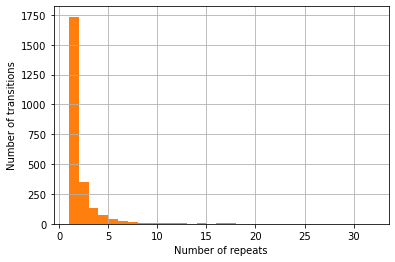

In [10]:
df2['t_count'].hist(bins=31).set_xlabel('Number of repeats')
df2['t_count'].hist(bins=31).set_ylabel('Number of transitions')
plt.show()

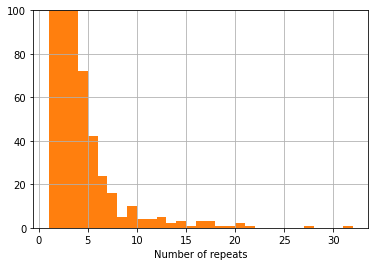

In [11]:
df2['t_count'].hist(bins=31).set_ylim(0, 100)
df2['t_count'].hist(bins=31).set_xlabel('Number of repeats')
plt.show()

As we can see from histograms above - most of the transitions happened once up to 8 times.

In [12]:
# Number of unique orders from the original table:
print('Number of unique Orders:', len(df['Cast Order'].unique()))
print('Number of unique Next Orders:', len(df['Next Cast Order'].unique()))
print('Number of unique Colors:', len(df['Color'].unique()))
print('Number of unique Next Colors:', len(df['Next Color Code'].unique()))

Number of unique Orders: 2641
Number of unique Next Orders: 2671
Number of unique Colors: 267
Number of unique Next Colors: 269


In [13]:
# Or from the grouped by color code pair table:
print('Number of unique Colors:', len(df2['Color'].unique()))
print('Number of unique Next Colors:', len(df2['Next Color Code'].unique()))

Number of unique Colors: 267
Number of unique Next Colors: 269


In [14]:
# intersection &, union |, difference -, symmetric difference ^
print(list(set(df['Color'].unique()) - set(df['Next Color Code'].unique())))
print(list(set(df['Next Color Code'].unique()) - set(df['Color'].unique())))
# there are a couple colors in next color code not in the colors column

[]
['dv', 'DP']


In [44]:
colors = df['Color'].unique().tolist()
colors.sort()
colors

['1M',
 '2W',
 '3D',
 '3N',
 '3Y1',
 '3Z7',
 '4B',
 '4Z1',
 '4Z2',
 '4Z3',
 '5A',
 '6H2',
 '6H3',
 '6N',
 '7B',
 '7M',
 '7R',
 '7T',
 '9H',
 '9I',
 '9J',
 '9P',
 'AA',
 'AB',
 'AE',
 'AH',
 'AI',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AT',
 'AW',
 'B2',
 'B3',
 'B4',
 'B5',
 'BD',
 'BE',
 'BF',
 'BH',
 'BI',
 'BK',
 'BL',
 'BM',
 'BN',
 'BQ',
 'BR',
 'BST',
 'CB',
 'CC',
 'CJ',
 'CL',
 'CN',
 'CO',
 'CS',
 'CT',
 'CV',
 'CW',
 'CX',
 'CXA',
 'DA',
 'DD',
 'DH',
 'DI',
 'DJ',
 'DM',
 'DMN',
 'DN',
 'DO',
 'DS',
 'DT',
 'DV',
 'DY',
 'EA',
 'EC',
 'ED',
 'EP',
 'ER',
 'EV',
 'EY',
 'EZ',
 'FA',
 'FB',
 'FD',
 'FF',
 'FH',
 'FJ',
 'FK',
 'FL',
 'FM',
 'FN',
 'FO',
 'FP',
 'FQ',
 'FR',
 'FS',
 'FT',
 'FU',
 'FV',
 'FVM',
 'FW',
 'FY',
 'G5',
 'G6',
 'G7',
 'GB',
 'GC',
 'GD',
 'GF',
 'GG',
 'GM',
 'GN',
 'GO',
 'GS',
 'GT',
 'GV',
 'GW',
 'GY',
 'HA',
 'HX',
 'HXA',
 'IL',
 'IM',
 'IP',
 'IY',
 'JB',
 'JC',
 'JF',
 'JP',
 'JV',
 'LGN',
 'LH',
 'LI',
 'LL',
 'LN',
 'LT',
 'M1',
 'MB',
 'MH',
 'MN',


So "Next color code" has two extra colors in addition to colors in "Colors" column.
But we can check below if this is actually true:

In [17]:
colors.count('DP')

0

In [20]:
colors.count('dv')

0

In [21]:
colors.count('DV')

1

So "dv" actually exists but as a 'DV'. We'll assume this is the same thing and fix the table.

In [38]:
df['Color'] = df['Color'].str.upper()
df['Next Color Code'] = df['Next Color Code'].str.upper()

In [39]:
df

,Cast Order,Color,Next Cast Order,Next Color Code,Cast Start,Cast End Time,Total Sheets,AGrade Sheets,Transition Sheets
0,11492916,GW,11503891,CT,2017-01-01 22:04:00,2017-01-02 02:10:00,451,411.0,1.0
1,11503891,CT,11503893,DV,2017-01-02 02:11:00,2017-01-02 13:38:00,1255,1164.0,60.0
2,11503893,DV,11503894,WH,2017-01-02 13:38:00,2017-01-03 01:02:00,1248,1225.0,8.0
3,11492915,GW,11504178,FB,2017-01-03 00:49:00,2017-01-03 03:00:00,292,288.0,2.0
4,11503894,WH,11503896,RP,2017-01-03 01:03:00,2017-01-03 13:24:00,1351,1300.0,16.0
...,...,...,...,...,...,...,...,...,...
4184,12944039,FT,12953366,W7,2019-04-20 05:49:00,2019-04-20 09:09:00,343,330.0,13.0
4185,12943708,SV,12954266,ZC,2019-04-20 22:37:00,2019-04-21 00:18:00,215,205.0,23.0
4186,12954266,ZC,12954164,ZT,2019-04-21 00:18:00,2019-04-21 04:34:00,547,533.0,15.0
4187,12954164,ZT,12947087,N3,2019-04-21 04:34:00,2019-04-21 05:48:00,162,144.0,4.0


In [107]:
df.loc[df['Next Color Code'] == 'dv']

,Cast Order,Color,Next Cast Order,Next Color Code,Cast Start,Cast End Time,Total Sheets,AGrade Sheets,Transition Sheets


So we got rid of 'dv' and now we only need to add a 'DP' to a colors list:

In [45]:
colors.append('DP')

['1M',
 '2W',
 '3D',
 '3N',
 '3Y1',
 '3Z7',
 '4B',
 '4Z1',
 '4Z2',
 '4Z3',
 '5A',
 '6H2',
 '6H3',
 '6N',
 '7B',
 '7M',
 '7R',
 '7T',
 '9H',
 '9I',
 '9J',
 '9P',
 'AA',
 'AB',
 'AE',
 'AH',
 'AI',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AT',
 'AW',
 'B2',
 'B3',
 'B4',
 'B5',
 'BD',
 'BE',
 'BF',
 'BH',
 'BI',
 'BK',
 'BL',
 'BM',
 'BN',
 'BQ',
 'BR',
 'BST',
 'CB',
 'CC',
 'CJ',
 'CL',
 'CN',
 'CO',
 'CS',
 'CT',
 'CV',
 'CW',
 'CX',
 'CXA',
 'DA',
 'DD',
 'DH',
 'DI',
 'DJ',
 'DM',
 'DMN',
 'DN',
 'DO',
 'DS',
 'DT',
 'DV',
 'DY',
 'EA',
 'EC',
 'ED',
 'EP',
 'ER',
 'EV',
 'EY',
 'EZ',
 'FA',
 'FB',
 'FD',
 'FF',
 'FH',
 'FJ',
 'FK',
 'FL',
 'FM',
 'FN',
 'FO',
 'FP',
 'FQ',
 'FR',
 'FS',
 'FT',
 'FU',
 'FV',
 'FVM',
 'FW',
 'FY',
 'G5',
 'G6',
 'G7',
 'GB',
 'GC',
 'GD',
 'GF',
 'GG',
 'GM',
 'GN',
 'GO',
 'GS',
 'GT',
 'GV',
 'GW',
 'GY',
 'HA',
 'HX',
 'HXA',
 'IL',
 'IM',
 'IP',
 'IY',
 'JB',
 'JC',
 'JF',
 'JP',
 'JV',
 'LGN',
 'LH',
 'LI',
 'LL',
 'LN',
 'LT',
 'M1',
 'MB',
 'MH',
 'MN',


In [46]:
colors.sort()
colors

['1M',
 '2W',
 '3D',
 '3N',
 '3Y1',
 '3Z7',
 '4B',
 '4Z1',
 '4Z2',
 '4Z3',
 '5A',
 '6H2',
 '6H3',
 '6N',
 '7B',
 '7M',
 '7R',
 '7T',
 '9H',
 '9I',
 '9J',
 '9P',
 'AA',
 'AB',
 'AE',
 'AH',
 'AI',
 'AN',
 'AO',
 'AQ',
 'AR',
 'AT',
 'AW',
 'B2',
 'B3',
 'B4',
 'B5',
 'BD',
 'BE',
 'BF',
 'BH',
 'BI',
 'BK',
 'BL',
 'BM',
 'BN',
 'BQ',
 'BR',
 'BST',
 'CB',
 'CC',
 'CJ',
 'CL',
 'CN',
 'CO',
 'CS',
 'CT',
 'CV',
 'CW',
 'CX',
 'CXA',
 'DA',
 'DD',
 'DH',
 'DI',
 'DJ',
 'DM',
 'DMN',
 'DN',
 'DO',
 'DP',
 'DS',
 'DT',
 'DV',
 'DY',
 'EA',
 'EC',
 'ED',
 'EP',
 'ER',
 'EV',
 'EY',
 'EZ',
 'FA',
 'FB',
 'FD',
 'FF',
 'FH',
 'FJ',
 'FK',
 'FL',
 'FM',
 'FN',
 'FO',
 'FP',
 'FQ',
 'FR',
 'FS',
 'FT',
 'FU',
 'FV',
 'FVM',
 'FW',
 'FY',
 'G5',
 'G6',
 'G7',
 'GB',
 'GC',
 'GD',
 'GF',
 'GG',
 'GM',
 'GN',
 'GO',
 'GS',
 'GT',
 'GV',
 'GW',
 'GY',
 'HA',
 'HX',
 'HXA',
 'IL',
 'IM',
 'IP',
 'IY',
 'JB',
 'JC',
 'JF',
 'JP',
 'JV',
 'LGN',
 'LH',
 'LI',
 'LL',
 'LN',
 'LT',
 'M1',
 'MB',
 'MH',


In [47]:
len(colors)

268

### Step 4:
Now lets make a matrix:

In [54]:
df2

,Color,Next Color Code,ts_mean,ts_min,ts_max,t_count
0,1M,CW,109.666667,69.0,173.0,6
1,1M,WN,9.000000,9.0,9.0,1
2,2W,IP,2.500000,1.0,4.0,2
3,2W,NF,42.000000,42.0,42.0,1
4,2W,VY,20.000000,20.0,20.0,1
...,...,...,...,...,...,...
2408,ZZ,FD,33.666667,17.0,62.0,3
2409,ZZ,FN,13.000000,13.0,13.0,1
2410,ZZ,TO,32.000000,32.0,32.0,1
2411,ZZ,VU,10.000000,10.0,10.0,1


In [49]:
shape = (len(colors), len(colors))
matrix = np.zeros(shape)
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
colors[0]

'1M'

In [147]:
val = df2['ts_mean'].loc[(df2['Color'] == colors[0]) &
                         (df2['Next Color Code'] == colors[1])].tolist()
val[0]

109.66666666666667

In [163]:
for i in range(0, len(colors)):
    for j in range(0, len(colors)):
        try:
            value = df2['ts_mean'].loc[(df2['Color'] == colors[i]) &
                                       (df2['Next Color Code'] == colors[j])].tolist()
            matrix[i, j] = value[0]
        except:
            matrix[i, j] = 80

5:80: E501 line too long (86 > 79 characters)
7:9: E722 do not use bare 'except'


In [164]:
matrix

array([[80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 16., 80.],
       ...,
       [80., 80., 80., ..., 80., 80., 80.],
       [80., 80., 18., ..., 80., 80., 80.],
       [80., 80., 80., ..., 80., 80., 80.]])

### Step ...:
Now lets load the description data set:

In [165]:
# Second data table with color description
df_desc = pd.read_excel('../data/Variable cost per sheet.xlsx', header=3)
df_desc

,Line,CC DIM,D code,2019 GLBL STD,Super Clean,Demand,Sales Rank,Sales Rank Cat,Family,Sub Family,...,Color,Sub Family Number,Sequence,VCOM,TCOM,Mean Trans Loss,Transition penalty,Family Transition Cost,Transition Cost,Update Family Seq
0,CSL2,3D1/2,D12516781,NM,NaN,2693,107,R5 101+,Standard,Genesis,...,Clay,2,44.0,117.357384,156.761945,105.846154,NaN,NaN,12421.827745,2
1,CSL2,4B1/2,D13901285,Std,NaN,5189,83,R4 51-100,Standard,Lustra,...,Sparkling White,3,58.0,155.064526,208.946769,41.400000,NaN,NaN,6419.671385,3
2,CSL1,7B1/2,D11975095,Std,NaN,5475,26,R2 11-30,Granite,Summit,...,Maui,2,20.0,125.609690,187.432048,27.600000,NaN,NaN,3466.827448,2
3,CSL2,AA1/2,D12361842,Std,NaN,6566,94,R4 51-100,Granite,Artisan,...,Lava Rock,1,6.0,146.220113,212.491799,36.916667,11187.0,NaN,16584.959182,1
4,CSL1,AB1/2,D11972996,Std,NaN,10840,15,R2 11-30,Granite,Summit,...,Abalone,2,19.0,115.219542,171.037488,44.500000,NaN,NaN,5127.269602,2
5,CSL2,AE1/2,D12291486,Std,NaN,1924,110,R5 101+,Granite,Artisan,...,Earth,1,10.0,216.388032,310.502648,233.600000,11187.0,NaN,61735.244347,1
6,CSL2,AI1/2,D13287547,Std,Sup-Clean,6347,95,R4 51-100,Granite,Magna,...,Arctic Ice,4,71.0,136.084866,199.102148,56.384615,NaN,NaN,7673.092803,4
7,CSL1,AN1/2,D11972735,NM,NaN,2439,47,R3 31-50,Standard,Lustra,...,Anthracite,6,83.0,234.813363,302.050870,113.411765,NaN,NaN,26630.597930,6
8,CSL2,AN1/2,D11972735,NM,NaN,1765,47,R3 31-50,Standard,Lustra,...,Anthracite,3,57.0,234.813363,302.050870,113.411765,NaN,NaN,26630.597930,3
9,CSL1,AO1/2,D11973014,NM,NaN,414,76,R4 51-100,Granite,Magna,...,Acorn,3,33.0,156.345437,229.052004,16.500000,NaN,NaN,2579.699712,3


In [ ]:
df_desc.shape

In [ ]:
def merge_transitions():
    